In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from SALib.sample import saltelli
from SALib.analyze import sobol

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Load the dataset with chunking
noblock = xr.open_dataset('../../oneTurbineNoBlockage/FarmFlow.nc', chunks={'time': 100})
block = xr.open_dataset('../../oneTurbineBlockage/FarmFlow.nc', chunks={'time': 100})

# Calculate the mean and variance with chunking
ws_eff_mean_block = block['WS_eff'].mean(dim='time').compute()
ws_eff_variance_block = block['WS_eff'].var(dim='time').compute()
ws_eff_mean_noblock = noblock['WS_eff'].mean(dim='time').compute()
ws_eff_variance_noblock = noblock['WS_eff'].var(dim='time').compute()

x = np.linspace(block.x.min(), block.x.max(), len(block.x))
y = np.linspace(block.y.min(), block.y.max(), len(block.y))

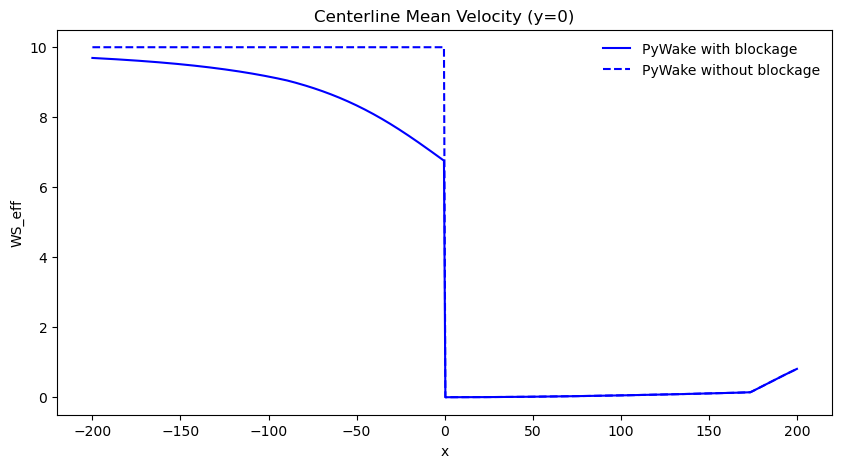

In [7]:
# Extract the centerline (y=0) data
centerline_block = block.sel(y=0, method='nearest')
centerline_noblock = noblock.sel(y=0, method='nearest')

# Compute the mean and variance along the time dimension for the centerline data
centerline_mean_block = centerline_block['WS_eff'].mean(dim='time').compute()
centerline_variance_block = centerline_block['WS_eff'].var(dim='time').compute()
centerline_mean_noblock = centerline_noblock['WS_eff'].mean(dim='time').compute()
centerline_variance_noblock = centerline_noblock['WS_eff'].var(dim='time').compute()

# Create a figure and axis for plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# Plot mean of WS_eff along the centerline
ax.plot(centerline_block['x'], centerline_mean_block, label='PyWake with blockage', c='blue')
ax.plot(centerline_noblock['x'], centerline_mean_noblock, label='PyWake without blockage', c='blue', ls='--')

# Plot variance of WS_eff along the centerline
#ax2 = ax.twinx()
#ax2.plot(centerline_block['x'], centerline_variance_block, label='Variance with blockage', c='orange')
#ax2.plot(centerline_block['x'], centerline_variance_noblock, label='Variance without blockage', c='orange', ls='--')
#ax2.legend(loc='lower right')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('WS_eff')
ax.set_title('Centerline Mean Velocity (y=0)')

# Add legend
ax.legend()

plt.show()


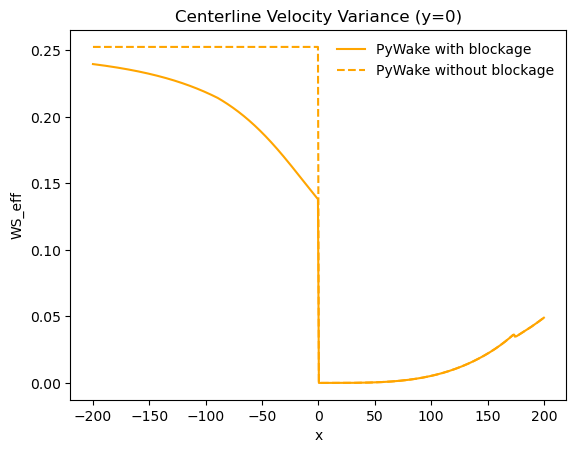

In [8]:
# Plot variance of WS_eff along the centerline
plt.plot(centerline_block['x'], centerline_variance_block, label='PyWake with blockage', c='orange')
plt.plot(centerline_block['x'], centerline_variance_noblock, label='PyWake without blockage', c='orange', ls='--')
plt.legend(loc='lower right')

# Set labels and title
plt.xlabel('x')
plt.ylabel('WS_eff')
plt.title('Centerline Velocity Variance (y=0)')

# Add legend
plt.legend()

plt.show()
